In [2]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('timeseries.csv')


In [145]:
df = df[:96431:]
df = df.dropna(subset=['time']) 
df['formated_time'] = pd.to_datetime(df['time'], format='%Y%m%d:%H%M')

df['month'] = df['formated_time'].dt.month
df['day'] = df['formated_time'].dt.day
df['hour'] = df['formated_time'].dt.hour
df.tail(20)
# df['time'][78886]

,time,G(i),H_sun,T2m,WS10m,Int,formated_time,month,day,hour
96411,20201231:0307,0,0.00,12.40,1.72,0.0,2020-12-31 03:07:00,12,31,3
96412,20201231:0407,32.27,2.86,12.25,1.79,0.0,2020-12-31 04:07:00,12,31,4
96413,20201231:0507,406.55,15.75,14.13,1.59,0.0,2020-12-31 05:07:00,12,31,5
96414,20201231:0607,669.18,27.88,19.46,1.31,0.0,2020-12-31 06:07:00,12,31,6
96415,20201231:0707,867.56,38.68,22.73,1.10,0.0,2020-12-31 07:07:00,12,31,7
96416,20201231:0807,1001.58,47.13,24.99,0.90,0.0,2020-12-31 08:07:00,12,31,8
96417,20201231:0907,1048.06,51.63,26.80,1.45,0.0,2020-12-31 09:07:00,12,31,9
96418,20201231:1007,1013.41,50.79,28.01,2.28,0.0,2020-12-31 10:07:00,12,31,10
96419,20201231:1107,904.55,44.90,28.57,2.97,0.0,2020-12-31 11:07:00,12,31,11
96420,20201231:1207,721.79,35.59,28.55,3.45,0.0,2020-12-31 12:07:00,12,31,12


In [146]:
# Assuming your DataFrame is named df
df.drop(['Int', 'formated_time','month','day'], axis=1, inplace=True)

df.head(30)

,time,G(i),H_sun,T2m,WS10m,hour
0,20100101:0007,0,0.00,11.17,1.59,0
1,20100101:0107,0,0.00,10.67,1.59,1
2,20100101:0207,0,0.00,10.11,1.79,2
3,20100101:0307,0,0.00,9.88,1.86,3
4,20100101:0407,91.98,2.76,9.77,1.93,4
5,20100101:0507,432.28,15.67,11.48,1.72,5
6,20100101:0607,681.34,27.82,15.42,1.72,6
7,20100101:0707,867.69,38.65,19.13,1.72,7
8,20100101:0807,987.62,47.15,21.08,1.66,8
9,20100101:0907,1034.38,51.71,22.13,1.24,9


In [147]:
df = df[:96431:]
df_multi = df.iloc[:,1:] # removing the time column 
df.tail(30)
print(df_multi.tail(10))
print(df_multi.dtypes)
# y = [x for x in df['Int'] if x == 0.0]
# print(y)b
# type(df_multi)


         G(i)  H_sun    T2m  WS10m  hour
96421  486.98   24.3  28.01   3.72    13
96422  221.49   11.9  26.94   3.59    14
96423       0    0.0  24.97   2.55    15
96424       0    0.0  23.19   1.86    16
96425       0    0.0  20.98   1.45    17
96426       0    0.0  19.31   1.38    18
96427       0    0.0  17.90   1.45    19
96428       0    0.0  16.52   1.52    20
96429       0    0.0  15.39   1.59    21
96430       0    0.0  14.28   1.59    22
G(i)      object
H_sun    float64
T2m      float64
WS10m    float64
hour       int64
dtype: object


In [148]:
df_multi['G(i)'] = pd.to_numeric(df_multi['G(i)'], errors='coerce')
unique_types = df_multi['G(i)'].apply(type).unique()

print(unique_types)

[<class 'float'>]


In [149]:

print(df_multi.dtypes)

G(i)     float64
H_sun    float64
T2m      float64
WS10m    float64
hour       int64
dtype: object


In [150]:



correlation = df_multi['G(i)'].corr(df_multi['H_sun'])

print("Pearson Correlation Coefficient:", correlation)

Pearson Correlation Coefficient: 0.900361066319861


In [1]:
# # Initialize the Min-Max Scaler

scaler = MinMaxScaler(feature_range=(0, 1))

# # Fit and transform the data
scaled_data = scaler.fit_transform(df_multi)
print(scaled_data.shape)
print(scaled_data[1:10,:])

NameError: name 'MinMaxScaler' is not defined

In [152]:
df_orignal_scaled = df_multi # scaled_data
#df_orignal = df_multi # for unscaled 
#df_scaled = df_multi[:78888:] 
# changed this scaled_data[:78888:] 
df_scaled = scaled_data[:78888:] 
df_scaled

array([[0.        , 0.        , 0.17262939, 0.26194399, 0.        ],
       [0.        , 0.        , 0.15526224, 0.26194399, 0.04347826],
       [0.        , 0.        , 0.13581105, 0.29489292, 0.08695652],
       ...,
       [0.        , 0.        , 0.34560611, 0.36408567, 0.91304348],
       [0.        , 0.        , 0.30809309, 0.37561779, 0.95652174],
       [0.        , 0.        , 0.27856895, 0.38550247, 1.        ]])

In [153]:

print(df_scaled[0:5:]) # this it the input
print(df_scaled[5:6:]) # this is the output

[[0.         0.         0.17262939 0.26194399 0.        ]
 [0.         0.         0.15526224 0.26194399 0.04347826]
 [0.         0.         0.13581105 0.29489292 0.08695652]
 [0.         0.         0.12782216 0.30642504 0.13043478]
 [0.07973716 0.03197405 0.12400139 0.31795717 0.17391304]]
[[0.3747421  0.18153383 0.18339701 0.28336079 0.2173913 ]]


In [154]:
def df_to_X_y(df_as_np, window_size=5):
  #df_as_np = df_as_np.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [a for a in df_as_np[i:i+window_size,:]]
    X.append(row)
    label = df_as_np[i+window_size,:]
    y.append(label)
  return np.array(X), np.array(y)

In [155]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(df_scaled, WINDOW_SIZE)
print(X1[1])
print("slfejlksdjlfkjdslkjfjlk")
print(y1[1])
X1.shape, y1.shape

[[0.         0.         0.15526224 0.26194399 0.04347826]
 [0.         0.         0.13581105 0.29489292 0.08695652]
 [0.         0.         0.12782216 0.30642504 0.13043478]
 [0.07973716 0.03197405 0.12400139 0.31795717 0.17391304]
 [0.3747421  0.18153383 0.18339701 0.28336079 0.2173913 ]]
slfejlksdjlfkjdslkjfjlk
[0.59065139 0.32228916 0.32025009 0.28336079 0.26086957]


((78883, 5, 5), (78883, 5))

In [156]:
X_train1, y_train1 = X1[:61367], y1[:61367]
X_val1, y_val1 = X1[61367:70127], y1[61367:70127] # 1 year for validation [61,367 , 70127]
X_test1, y_test1 = X1[70128:], y1[70128:] #  1 year testing [70,128 , 78887]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape


((61367, 5, 5), (61367, 5), (8760, 5, 5), (8760, 5), (8755, 5, 5), (8755, 5))

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 5)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(5, 'linear'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 5)                 45        
                                                                 
Total params: 18,485
Trainable params: 18,485
Non-trainable params: 0
_________________________________________________________________


In [158]:
from tensorflow.keras.callbacks import EarlyStopping

In [159]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, verbose=1, mode='min')

In [160]:
cp1 = ModelCheckpoint('model_time/', save_best_only=True)
# metrics , learning rate, loss  can be changed 
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [161]:
history = model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1,early_stopping])

Epoch 1/100
1918/1918 [==============================] - ETA: 0s - loss: 0.0139 - root_mean_squared_error: 0.1177

INFO:tensorflow:Assets written to: model_time\assets


INFO:tensorflow:Assets written to: model_time\assets


1918/1918 [==============================] - 47s 21ms/step - loss: 0.0139 - root_mean_squared_error: 0.1177 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0876
Epoch 2/100
1918/1918 [==============================] - 17s 9ms/step - loss: 0.0077 - root_mean_squared_error: 0.0877 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0950
Epoch 3/100
1914/1918 [============================>.] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.0800

INFO:tensorflow:Assets written to: model_time\assets


INFO:tensorflow:Assets written to: model_time\assets


1918/1918 [==============================] - 37s 19ms/step - loss: 0.0064 - root_mean_squared_error: 0.0799 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0702
Epoch 4/100
1914/1918 [============================>.] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0730

INFO:tensorflow:Assets written to: model_time\assets


INFO:tensorflow:Assets written to: model_time\assets


1918/1918 [==============================] - 40s 21ms/step - loss: 0.0053 - root_mean_squared_error: 0.0729 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0614
Epoch 5/100
1915/1918 [============================>.] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0680

INFO:tensorflow:Assets written to: model_time\assets


INFO:tensorflow:Assets written to: model_time\assets


1918/1918 [==============================] - 42s 22ms/step - loss: 0.0046 - root_mean_squared_error: 0.0680 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0602
Epoch 6/100
1913/1918 [============================>.] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0644

INFO:tensorflow:Assets written to: model_time\assets


INFO:tensorflow:Assets written to: model_time\assets


1918/1918 [==============================] - 41s 21ms/step - loss: 0.0041 - root_mean_squared_error: 0.0644 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0595
Epoch 7/100
1918/1918 [==============================] - 19s 10ms/step - loss: 0.0043 - root_mean_squared_error: 0.0653 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0612
Epoch 8/100
1918/1918 [==============================] - 20s 10ms/step - loss: 0.0039 - root_mean_squared_error: 0.0628 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0605
Epoch 9/100
1914/1918 [============================>.] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.0671

INFO:tensorflow:Assets written to: model_time\assets


INFO:tensorflow:Assets written to: model_time\assets


1918/1918 [==============================] - 41s 21ms/step - loss: 0.0045 - root_mean_squared_error: 0.0670 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0593
Epoch 10/100
1918/1918 [==============================] - 19s 10ms/step - loss: 0.0033 - root_mean_squared_error: 0.0572 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0604
Epoch 11/100
1918/1918 [==============================] - 19s 10ms/step - loss: 0.0035 - root_mean_squared_error: 0.0593 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0625
Epoch 11: early stopping


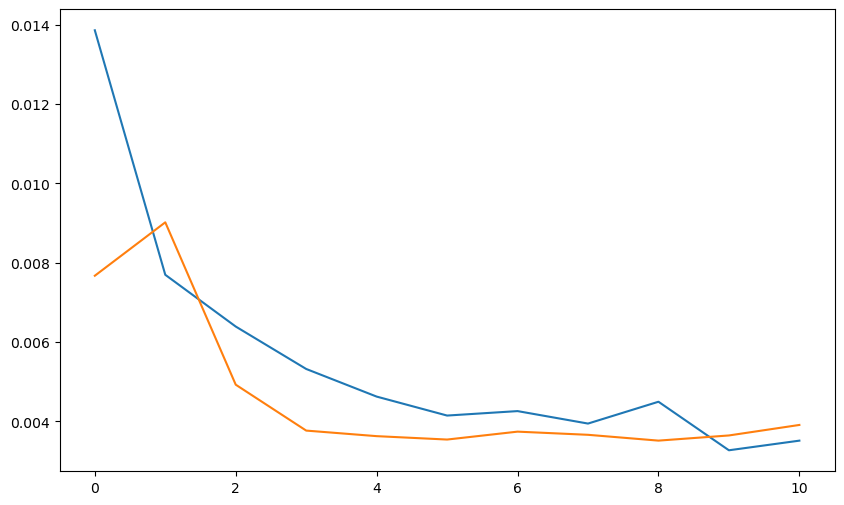

In [162]:
plt.figure(figsize=(10, 6)) # Optional: Adjusts the figure size
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

In [163]:
from tensorflow.keras.models import load_model
model1 = load_model('model_time/')

In [164]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1.flatten()})
train_results.head(30)

1918/1918 [==============================] - 10s 5ms/step


,Train Predictions,Actuals
0,0.326822,0.374742
1,0.270374,0.181534
2,0.215695,0.183397
3,0.231207,0.283361
4,0.216536,0.217391
5,0.513449,0.590651
6,0.444249,0.322289
7,0.350953,0.320250
8,0.229897,0.283361
9,0.274020,0.260870


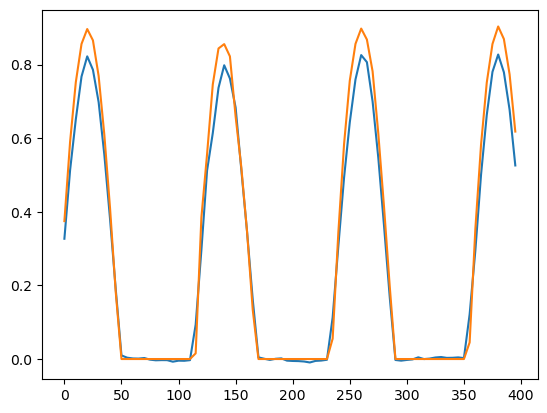

In [165]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][0:400:5])
plt.plot(train_results['Actuals'][0:400:5])

In [166]:

val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1.flatten()})
val_results

274/274 [==============================] - 1s 5ms/step


,Val Predictions,Actuals
0,0.085564,0.098332
1,0.096338,0.031974
2,0.135327,0.113234
3,0.488254,0.489292
4,0.127652,0.173913
...,...,...
43795,0.004294,0.000000
43796,-0.007655,0.000000
43797,0.135626,0.129559
43798,0.301981,0.273476


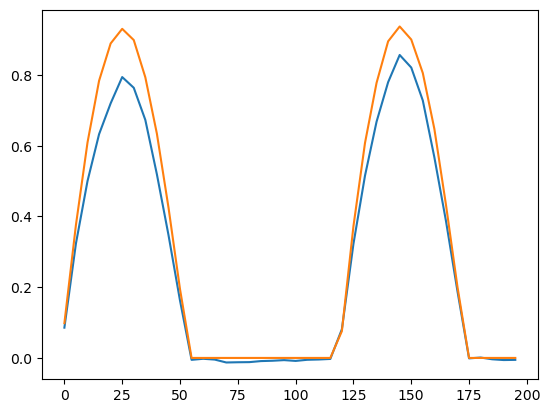

In [167]:
plt.plot(val_results['Val Predictions'][0:200:5])
plt.plot(val_results['Actuals'][0:200:5])

In [168]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1.flatten()})
test_results

274/274 [==============================] - 1s 5ms/step


,Test Predictions,Actuals
0,0.288000,0.341072
1,0.227229,0.181534
2,0.202411,0.213963
3,0.185292,0.181219
4,0.202393,0.217391
...,...,...
43770,-0.006173,0.000000
43771,0.013778,0.000000
43772,0.273884,0.278569
43773,0.395186,0.385502


In [1]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=500):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end:5])
  plt.plot(df['Actuals'][start:end:5])
  return df, mse(predictions, y)

274/274 [==============================] - 1s 5ms/step


(       Predictions   Actuals
 0         0.288000  0.341072
 1         0.227229  0.181534
 2         0.202411  0.213963
 3         0.185292  0.181219
 4         0.202393  0.217391
 ...            ...       ...
 43770    -0.006173  0.000000
 43771     0.013778  0.000000
 43772     0.273884  0.278569
 43773     0.395186  0.385502
 43774     0.985794  1.000000
 
 [43775 rows x 2 columns],
 0.0029370293023184505)

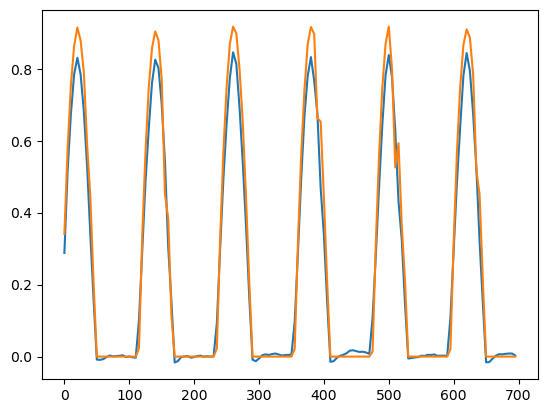

In [170]:
plot_predictions1(model1, X_test1, y_test1.flatten())

In [171]:
df_orignal_scaled = df_orignal_scaled.to_numpy()

In [172]:

kkk = df_orignal_scaled[78885:78890,:]
scaled_entry=scaler.transform(kkk)
print(scaled_entry)
print(kkk.shape)
reshaped_array = np.reshape(scaled_entry, (1, 5, 5))
print(reshaped_array)
predictions = model1.predict(reshaped_array)
print(predictions)
print(scaler.inverse_transform(predictions))
# predictions
# inverse_data = np.zeros((len(predictions), scaler.shape[1]))

[[0.         0.         0.34560611 0.36408567 0.91304348]
 [0.         0.         0.30809309 0.37561779 0.95652174]
 [0.         0.         0.27856895 0.38550247 1.        ]
 [0.         0.         0.25946509 0.3970346  0.        ]
 [0.         0.         0.24175061 0.3970346  0.04347826]]
(5, 5)
[[[0.         0.         0.34560611 0.36408567 0.91304348]
  [0.         0.         0.30809309 0.37561779 0.95652174]
  [0.         0.         0.27856895 0.38550247 1.        ]
  [0.         0.         0.25946509 0.3970346  0.        ]
  [0.         0.         0.24175061 0.3970346  0.04347826]]]
1/1 [==============================] - 0s 44ms/step
[[-0.00757616  0.00645487  0.22099003  0.40998825  0.0759456 ]]
[[-8.7394085  0.5571847 12.562304   2.4886286  1.7467488]]


In [173]:
from datetime import datetime, timedelta

def get_next_24_hours(start_month, start_day, start_hour):
    """
    Generate a list of tuples representing the month, day, and hour for the next 24 hours,
    given the start month, day, and hour.

    Parameters:
    - start_month (int): The starting month (1-12).
    - start_day (int): The starting day of the month.
    - start_hour (int): The starting hour of the day (0-23).

    Returns:
    - list of tuples: Each tuple contains (month, day, hour) for the next 24 hours.
    """
    # Current datetime based on input
    current_year = datetime.now().year  # Assuming the current year for simplicity
    start_datetime = datetime(year=current_year, month=start_month, day=start_day, hour=start_hour)

    # Initialize a list to hold the future time points
    future_times = []

    # Calculate the next 24 hours
    for i in range(1, 25):  # Start from 1 to include the next hour immediately
        future_time = start_datetime + timedelta(hours=i)
        future_times.append((future_time.month, future_time.day, future_time.hour))

    return future_times


In [174]:
input = df_orignal_scaled[78888:78893,:]  # Initial input extracted from your original scaled DataFrame
# next_24_hours =  get_next_24_hours()
print(input)
#month = int(input[4,4])
#day = int(input[4,5])
hour = int(input[4,4])
#print( month, day, hour)
print(hour)
next_hour = hour + 1
next_24_hours =  get_next_24_hours(month, day, hour )
# print(next_24_hours)

[[ 0.    0.   13.67  2.41  0.  ]
 [ 0.    0.   13.16  2.41  1.  ]
 [ 0.    0.   12.73  2.41  2.  ]
 [ 0.    0.   12.26  2.48  3.  ]
 [46.98  2.76 11.84  2.48  4.  ]]
4


In [175]:

input = df_orignal_scaled[78888:78893,:]  # Initial input extracted from your original scaled DataFrame
output_scaled = []  
output_not_scaled = [] 

next_time_counter = 0

for i in range(24):
    # Reshape input for the model prediction
    reshaped_array = np.reshape(input, (1, 5, 5))
    scaled_prediction = model1.predict(reshaped_array)
    reversed_prediction=scaler.inverse_transform(scaled_prediction)

    if reversed_prediction[0][0]<=0:
        reversed_prediction[0][0]=0.
        
    output_scaled.append(reversed_prediction)
    reversed_prediction[0][4]=next_hour
        
   
    # Reshape the prediction to match the input shape if necessary
    # This example assumes the model returns a prediction with shape (1, 4)
    # Adjust the reshaping based on the actual shape of your model's output
    scaled_prediction_reshaped = np.reshape(reversed_prediction, (1, 5))
    #scaled_prediction[0][4] = next_hour
    # scaled_prediction[0][4] = next_24_hours[next_time_counter][0]
    # scaled_prediction[0][5] = next_24_hours[next_time_counter][1]
    # scaled_prediction[0][6] = next_24_hours[next_time_counter][2]
    next_hour = next_hour + 1
    if next_hour > 23:
        next_hour = 0    
    
    input = np.reshape(input, (5, 5))  # Ensure input is in the correct shape before appending
    # Append the new prediction at the end of the input array
    input = np.vstack([input, scaled_prediction_reshaped])  # Stack vertically to add as a new row
    
    # Remove the oldest entry to maintain the sliding window of input data
    input = input[1:, :]  # Keep the last 5 entries, including the newly added prediction
 
   

    next_time_counter += 1
# print(output_scaled)  # Remains empty, uncomment if needed
print(output_scaled)  # Print or process the predictions as 




1/1 [==============================] - 0s 48ms/step
[array([[1.1865573e+03, 8.4582825e+01, 5.4313622e+01, 1.0361438e+00,
        5.0000000e+00]], dtype=float32), array([[1.1518478e+03, 7.4434265e+01, 1.8923691e+01, 8.1696367e-01,
        6.0000000e+00]], dtype=float32), array([[1.1623788e+03, 7.5157181e+01, 1.9012440e+01, 8.2053643e-01,
        7.0000000e+00]], dtype=float32), array([[1.2325288e+03, 7.9972763e+01, 1.9603632e+01, 8.4433627e-01,
        8.0000000e+00]], dtype=float32), array([[1.4917079e+03, 9.7764610e+01, 2.1787876e+01, 9.3226790e-01,
        9.0000000e+00]], dtype=float32), array([[1.4917102e+03, 9.7764771e+01, 2.1787895e+01, 9.3226874e-01,
        1.0000000e+01]], dtype=float32), array([[1.4917102e+03, 9.7764771e+01, 2.1787895e+01, 9.3226874e-01,
        1.1000000e+01]], dtype=float32), array([[1.4917102e+03, 9.7764771e+01, 2.1787895e+01, 9.3226874e-01,
        1.2000000e+01]], dtype=float32), array([[1.4917102e+03, 9.7764771e+01, 2.1787895e+01, 9.3226874e-01,
       

In [176]:
print("this is the real scaled output")
for i in output_scaled:
    print(i)

this is the real scaled output
[[1.1865573e+03 8.4582825e+01 5.4313622e+01 1.0361438e+00 5.0000000e+00]]
[[1.1518478e+03 7.4434265e+01 1.8923691e+01 8.1696367e-01 6.0000000e+00]]
[[1.1623788e+03 7.5157181e+01 1.9012440e+01 8.2053643e-01 7.0000000e+00]]
[[1.2325288e+03 7.9972763e+01 1.9603632e+01 8.4433627e-01 8.0000000e+00]]
[[1.4917079e+03 9.7764610e+01 2.1787876e+01 9.3226790e-01 9.0000000e+00]]
[[1.4917102e+03 9.7764771e+01 2.1787895e+01 9.3226874e-01 1.0000000e+01]]
[[1.4917102e+03 9.7764771e+01 2.1787895e+01 9.3226874e-01 1.1000000e+01]]
[[1.4917102e+03 9.7764771e+01 2.1787895e+01 9.3226874e-01 1.2000000e+01]]
[[1.4917102e+03 9.7764771e+01 2.1787895e+01 9.3226874e-01 1.3000000e+01]]
[[1.4917102e+03 9.7764771e+01 2.1787895e+01 9.3226874e-01 1.4000000e+01]]
[[1.4917102e+03 9.7764771e+01 2.1787895e+01 9.3226874e-01 1.5000000e+01]]
[[1.4917102e+03 9.7764771e+01 2.1787895e+01 9.3226874e-01 1.6000000e+01]]
[[1.4917102e+03 9.7764771e+01 2.1787895e+01 9.3226874e-01 1.7000000e+01]]
[[1.491

In [177]:
	G(i)
78893	46.98
78894	449.76
78895	707.26
78896	902.77
78897	1024.41
78898	1072.31
78899	1035.86
78900	926.62
78901	740.38
78902	487.93
78903	225.58
78904	0
78905	0
78906	0
78907	0
78908	0
78909	0
78910	0
78911	0
78912	0
78913	0
78914	0
78915	0
78916	0
78917	39.28

SyntaxError: invalid syntax (4283343160.py, line 2)